In [113]:
require('Synth')

data("basque")

dataprep.out = dataprep(foo = basque,
                        predictors= c("school.illit",
                                      "school.prim",
                                      "school.med",
                                      "school.high",
                                      "school.post.high",
                                      "invest"),
                        predictors.op = c("mean"),
                        dependent = c("gdpcap"),
                        unit.variable = c("regionno"),
                        time.variable = c("year"),
                        special.predictors = list(
                            list("gdpcap",1960:1969,c("mean")),                            
                            list("sec.agriculture",seq(1961,1969,2),c("mean")),
                            list("sec.energy",seq(1961,1969,2),c("mean")),
                            list("sec.industry",seq(1961,1969,2),c("mean")),
                            list("sec.construction",seq(1961,1969,2),c("mean")),
                            list("sec.services.venta",seq(1961,1969,2),c("mean")),
                            list("sec.services.nonventa",seq(1961,1969,2),c("mean")),
                            list("popdens",1969,c("mean"))),
                        treatment.identifier = 17,
                        controls.identifier = c(2:16,18),
                        time.predictors.prior = c(1964:1969),
                        time.optimize.ssr = c(1960:1969),
                        unit.names.variable = c("regionname"),
                        time.plot = c(1955:1997))



In [114]:
# combine the highest and second highest schooling category and eliminate highest
dataprep.out$X1["school.high",] = dataprep.out$X1["school.high", ] + dataprep.out$X1["school.post.high", ]
dataprep.out$X1 = as.matrix(dataprep.out$X1[-which(rownames(dataprep.out$X1) == "school.post.high"),])

dataprep.out$X0["school.high",] = dataprep.out$X0["school.high", ] + dataprep.out$X0["school.post.high",]
dataprep.out$X0 = as.matrix(dataprep.out$X0[-which(rownames(dataprep.out$X0) == "school.post.high"),])

# make total and compute shares for the shooling categories
lowest = which(rownames(dataprep.out$X0) == "school.illit")
highest = which(rownames(dataprep.out$X0) == "school.high")

dataprep.out$X1[lowest:highest,] = (100*dataprep.out$X1[lowest:highest,])/sum(dataprep.out$X1[lowest:highest,])
dataprep.out$X0[lowest:highest,] = 100*scale(dataprep.out$X0[lowest:highest,], center = FALSE,
                                            scale = colSums(dataprep.out$X0[lowest:highest,]))

In [115]:
synth.out = synth(data.prep.obj = dataprep.out)
synth.tables = synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.008864629 

solution.v:
 0.01556808 0.001791073 0.04417159 0.03409436 8.45038e-05 0.2009837 0.09484593 0.007689228 0.1339499 0.008723846 0.009680727 0.1081258 0.3402913 

solution.w:
 4.92e-08 5.17e-08 1.352e-07 2.85e-08 5.32e-08 5.177e-07 5.24e-08 7.29e-08 0.8507986 2.274e-07 4.03e-08 9.51e-08 0.1491998 5.61e-08 9.02e-08 1.061e-07 



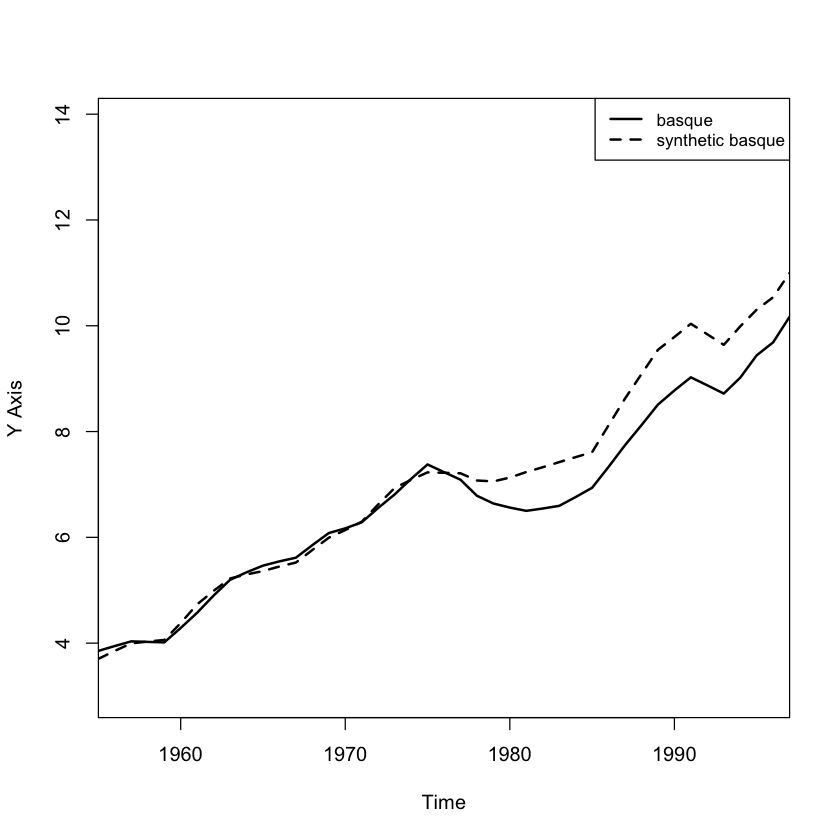

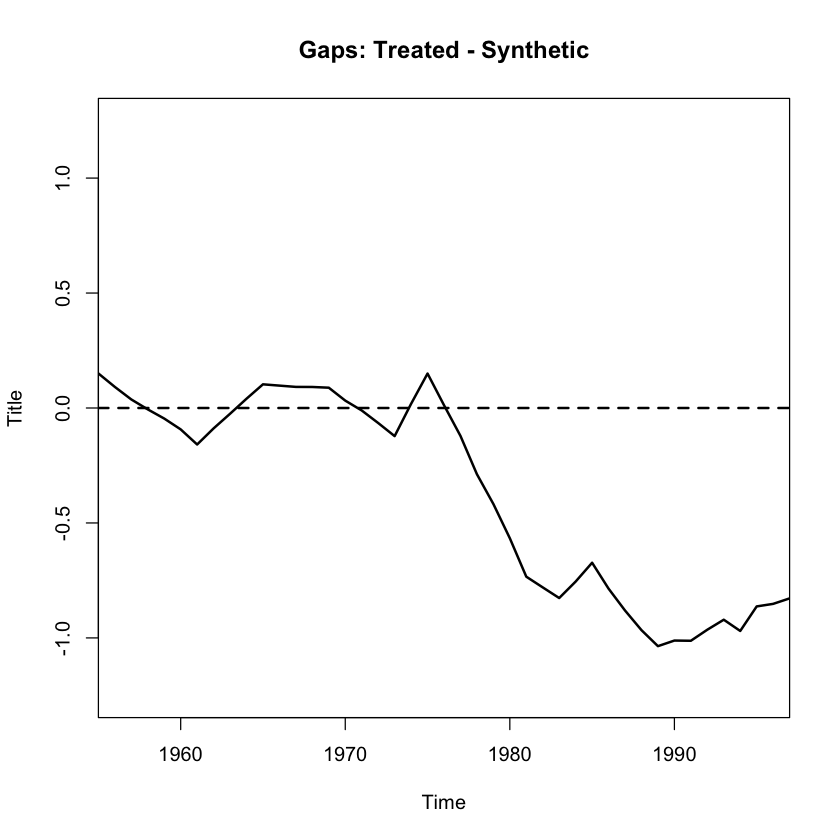

In [120]:
path.plot(synth.res = synth.out, dataprep.res = dataprep.out, Legend = c("basque", "synthetic basque"))
gaps.plot(synth.res = synth.out, dataprep.res = dataprep.out)
